In [1]:
import os
import warnings
from pathlib import Path

warnings.simplefilter(action="ignore", category=FutureWarning)
import matplotlib as mpl
import mplscience
import numpy as np
import pandas as pd
import seaborn as sns
import yaml
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix
import mplscience

mplscience.set_style()
%load_ext autoreload
%autoreload 2

In [2]:
output = Path(
    "/lustre/groups/ml01/workspace/moscot_paper/mapping/atac_results"
)
results = []
for file in os.listdir(output):
    l = file.split(",")
    params = {}
    if (output / file / "results.csv").is_file():
        for i in l:
            k, v = i.split("=")
            params.update({k: v})
        df = pd.DataFrame(params, index=[0])
        res = pd.read_csv(output / file / "results.csv", index_col=0)
        df = pd.concat([df, res], axis=1)
        results.append(df)
out = pd.concat(results)
out

,moscot.alpha,moscot.epsilon,moscot.sc_attr,moscot.tau_a,time,corr_results_mean_pearson,corr_results_median_pearson,corr_results_var_pearson,corr_results_max_pearson,corr_results_min_pearson,corr_results_mean_spearman,corr_results_median_spearman,corr_results_var_spearman,corr_results_max_spearman,corr_results_min_spearman,mean_diagonal_cell_transition,method.name,tangram.lr,method
0,0.3,0.05,X_pca_ATAC,0.999,0 days 00:00:12.836991,0.303643,0.299149,0.006045,0.463449,0.156551,0.264017,0.240802,0.005951,0.445835,0.154564,0.319814,NaN,NaN,NaN
0,0.5,0.01,X_pca_ATAC,1,0 days 00:00:03.494134,0.038065,0.043890,0.017378,0.306688,-0.217986,0.025041,0.050735,0.014318,0.198181,-0.224223,0.255252,NaN,NaN,NaN
0,0.3,0.05,X_pca,1,0 days 00:00:02.281166,0.283801,0.269020,0.005762,0.483865,0.118054,0.241786,0.243332,0.002558,0.348293,0.128055,0.284932,NaN,NaN,NaN
0,0.2,0.005,X_pca,1,0 days 00:00:04.241411,0.219945,0.206918,0.007493,0.416604,0.080760,0.200824,0.190786,0.004256,0.349409,0.090641,0.375862,NaN,NaN,NaN
0,0.5,0.05,X_pca,0.999,0 days 00:00:08.140911,0.166661,0.151197,0.013894,0.429677,-0.045082,0.127424,0.143999,0.007987,0.268637,-0.050575,0.244407,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.2,0.05,X_pca_ATAC,1,0 days 00:00:02.373713,0.335741,0.315722,0.006343,0.488709,0.166566,0.299455,0.279634,0.005471,0.475761,0.182012,0.348593,NaN,NaN,NaN
0,0.2,0.01,X_pca,0.999,0 days 00:00:06.209774,0.219037,0.181284,0.008480,0.452774,0.097401,0.189510,0.167091,0.004614,0.357981,0.078728,0.375948,NaN,NaN,NaN
0,0.4,0.05,X_pca_ATAC,0.999,0 days 00:00:08.745395,0.066711,0.065756,0.014758,0.331276,-0.168145,0.039235,0.064350,0.011307,0.210467,-0.197162,0.246801,NaN,NaN,NaN
0,0.2,0.05,X_pca_ATAC,0.999,0 days 00:00:08.724707,0.334470,0.313190,0.007243,0.505498,0.159590,0.290881,0.266912,0.006592,0.478967,0.179519,0.348705,NaN,NaN,NaN


In [3]:
tangram_pearson = out[out["method.name"] == "TANGRAM"]["corr_results_mean_pearson"].item()
tangram_spearman = out[out["method.name"] == "TANGRAM"]["corr_results_mean_spearman"].item()

In [4]:
out.columns

Index(['moscot.alpha', 'moscot.epsilon', 'moscot.sc_attr', 'moscot.tau_a',
       'time', 'corr_results_mean_pearson', 'corr_results_median_pearson',
       'corr_results_var_pearson', 'corr_results_max_pearson',
       'corr_results_min_pearson', 'corr_results_mean_spearman',
       'corr_results_median_spearman', 'corr_results_var_spearman',
       'corr_results_max_spearman', 'corr_results_min_spearman',
       'mean_diagonal_cell_transition', 'method.name', 'tangram.lr', 'method'],
      dtype='object')

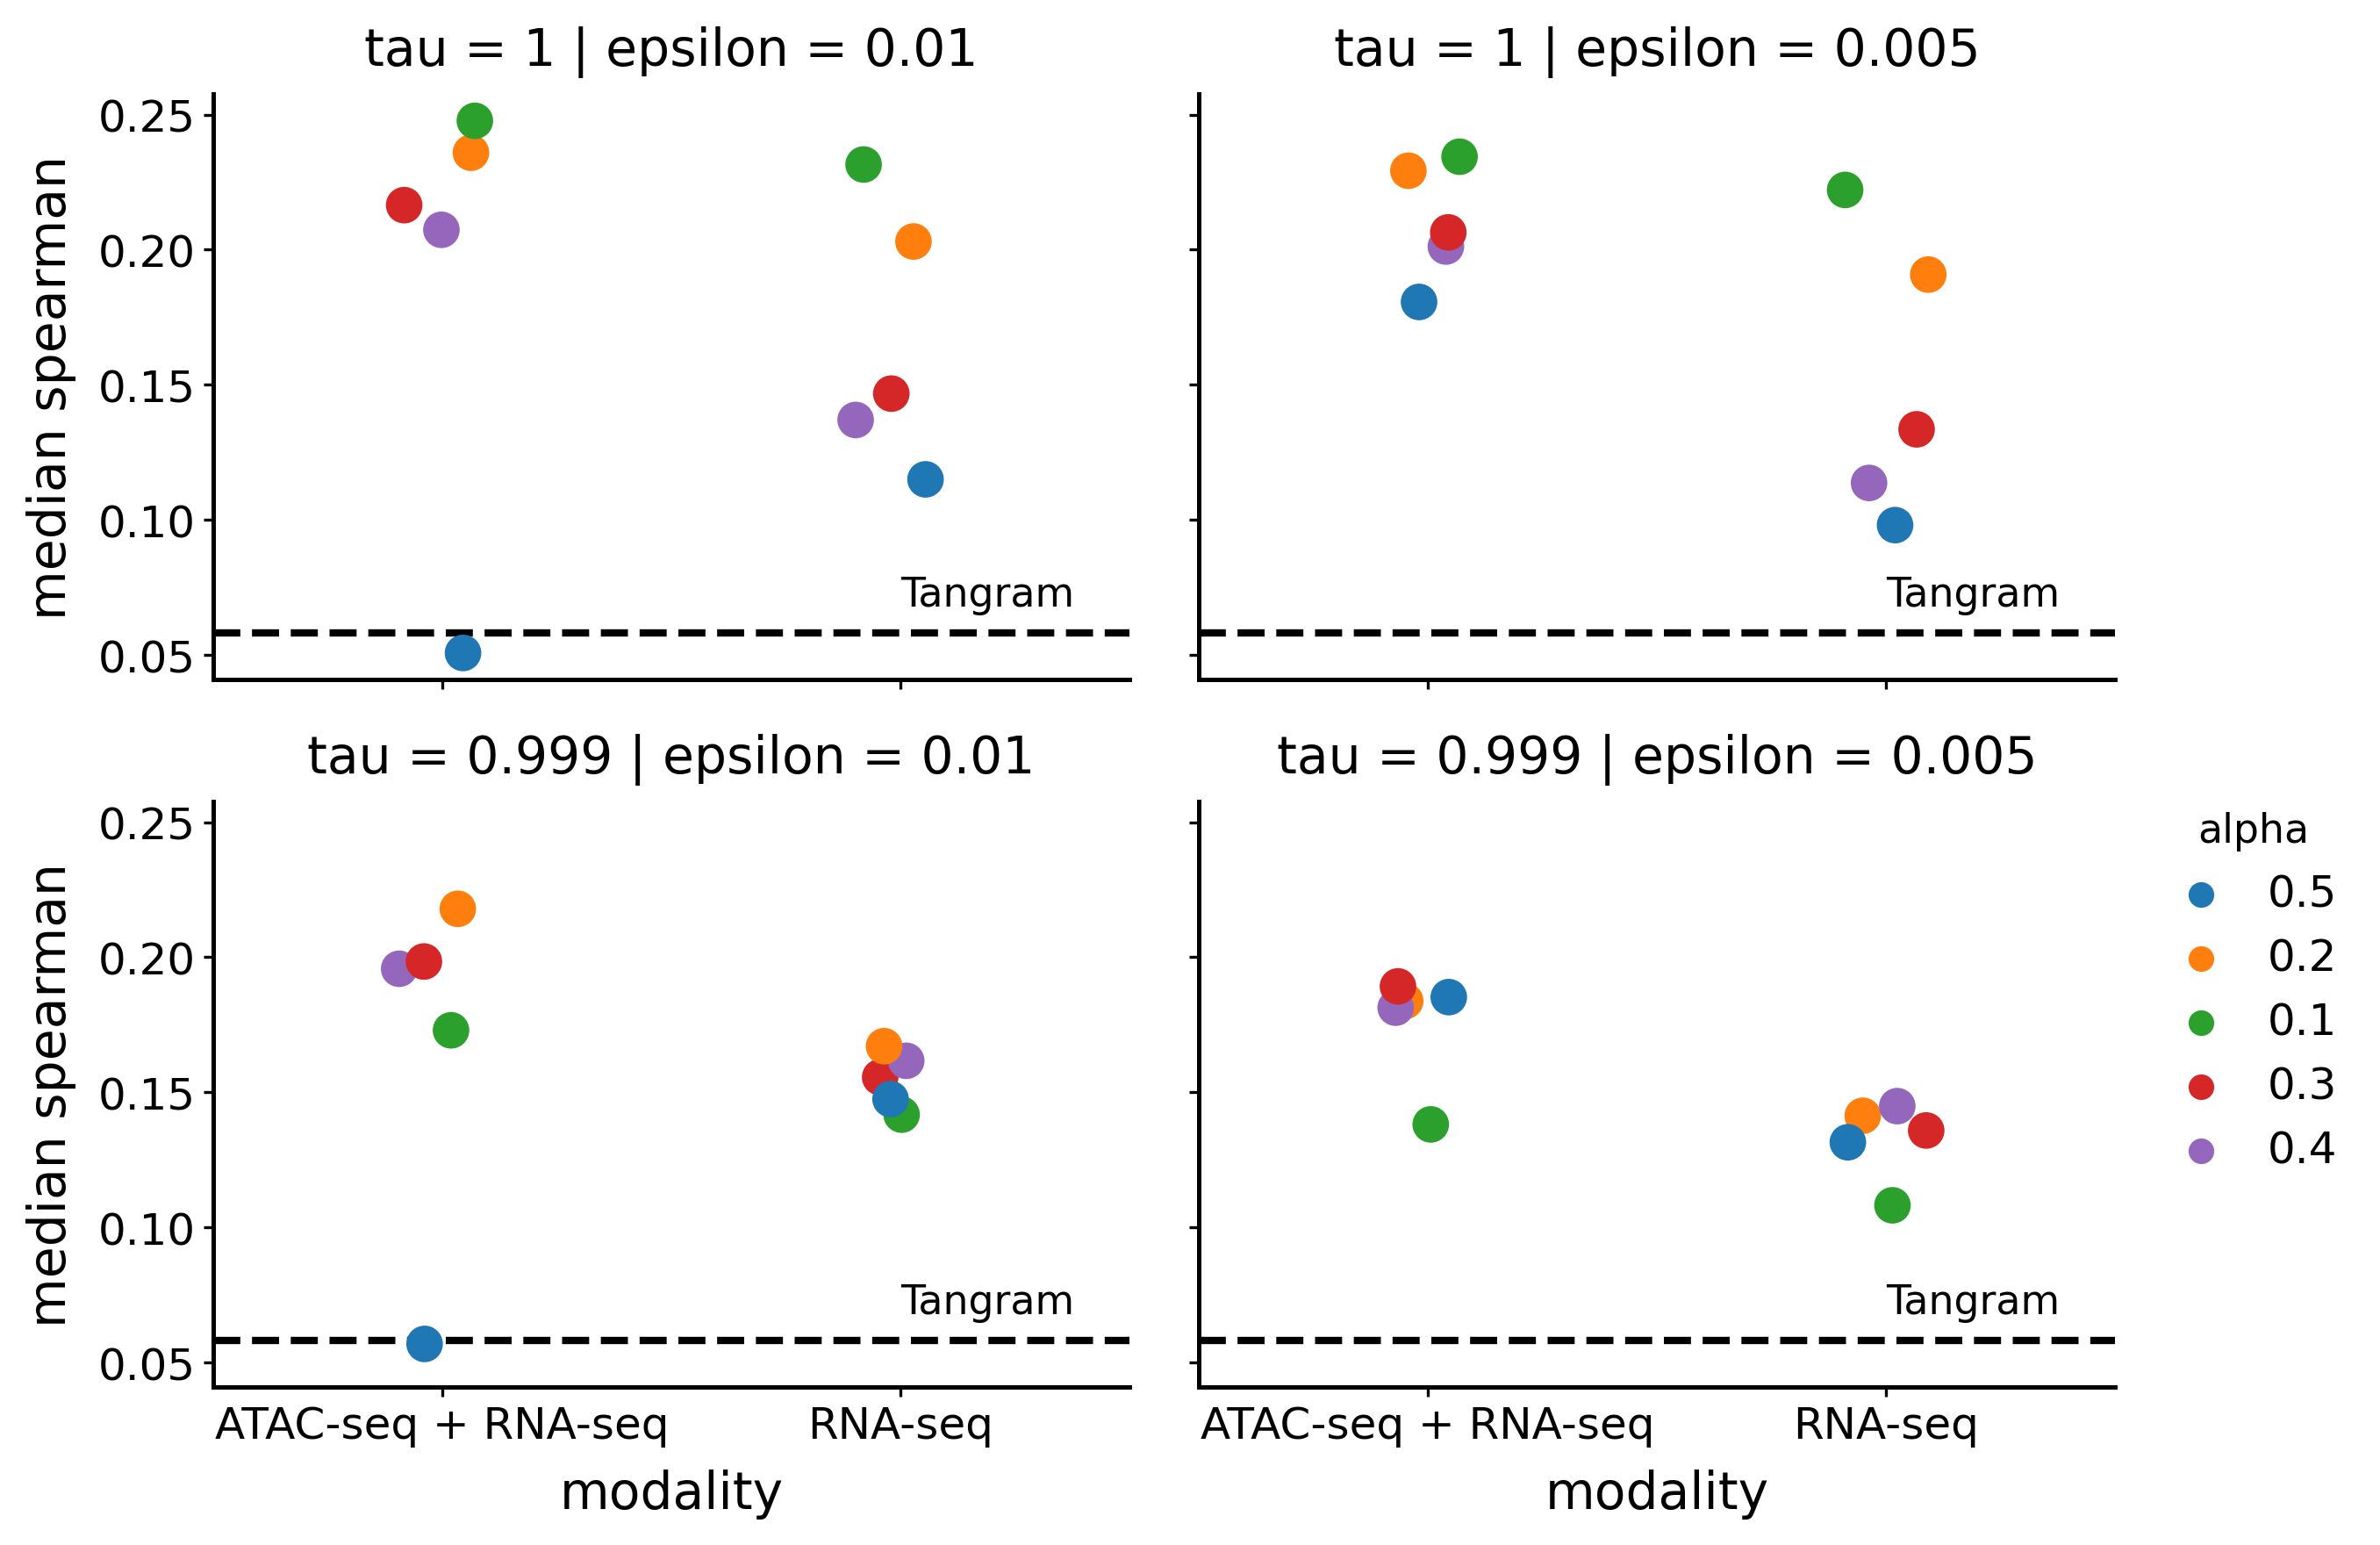

In [11]:
plt.rcParams['legend.scatterpoints'] = 1
out = out.rename(
    columns={
        "moscot.alpha": "alpha",
        "moscot.epsilon": "epsilon",
        "moscot.tau_a": "tau",
        "moscot.sc_attr": "modality",
        "corr_results_median_spearman": "median spearman",
        "corr_results_median_pearson": "median pearson",
    })

out["modality"] = out["modality"].replace({
    "X_pca_ATAC": "ATAC-seq + RNA-seq",
    "X_pca": "RNA-seq",
})
plt.rcParams['figure.dpi'] = 300
outplot = sns.catplot(
    data=out[(out["epsilon"]!="0.05") & (out["method.name"]!="TANGRAM")],
    x="modality",
    y="median spearman",
    hue="alpha",
    col="epsilon",
    row="tau",
    # row="moscot.tau_a",
    # col_wrap=5,
    kind="strip",
    s=100,
    height=3, 
    aspect=5/4,
    legend=True,
    # legend_out=True,
)
sns.move_legend(outplot, "upper right", bbox_to_anchor=(1.1, 0.5))
outplot.map(plt.axhline, y=tangram_spearman, ls='--', color='black', linewidth=2)
outplot.map(plt.text, x= 1, y=tangram_spearman+0.01, s="Tangram", color="Black")
plt.tight_layout()

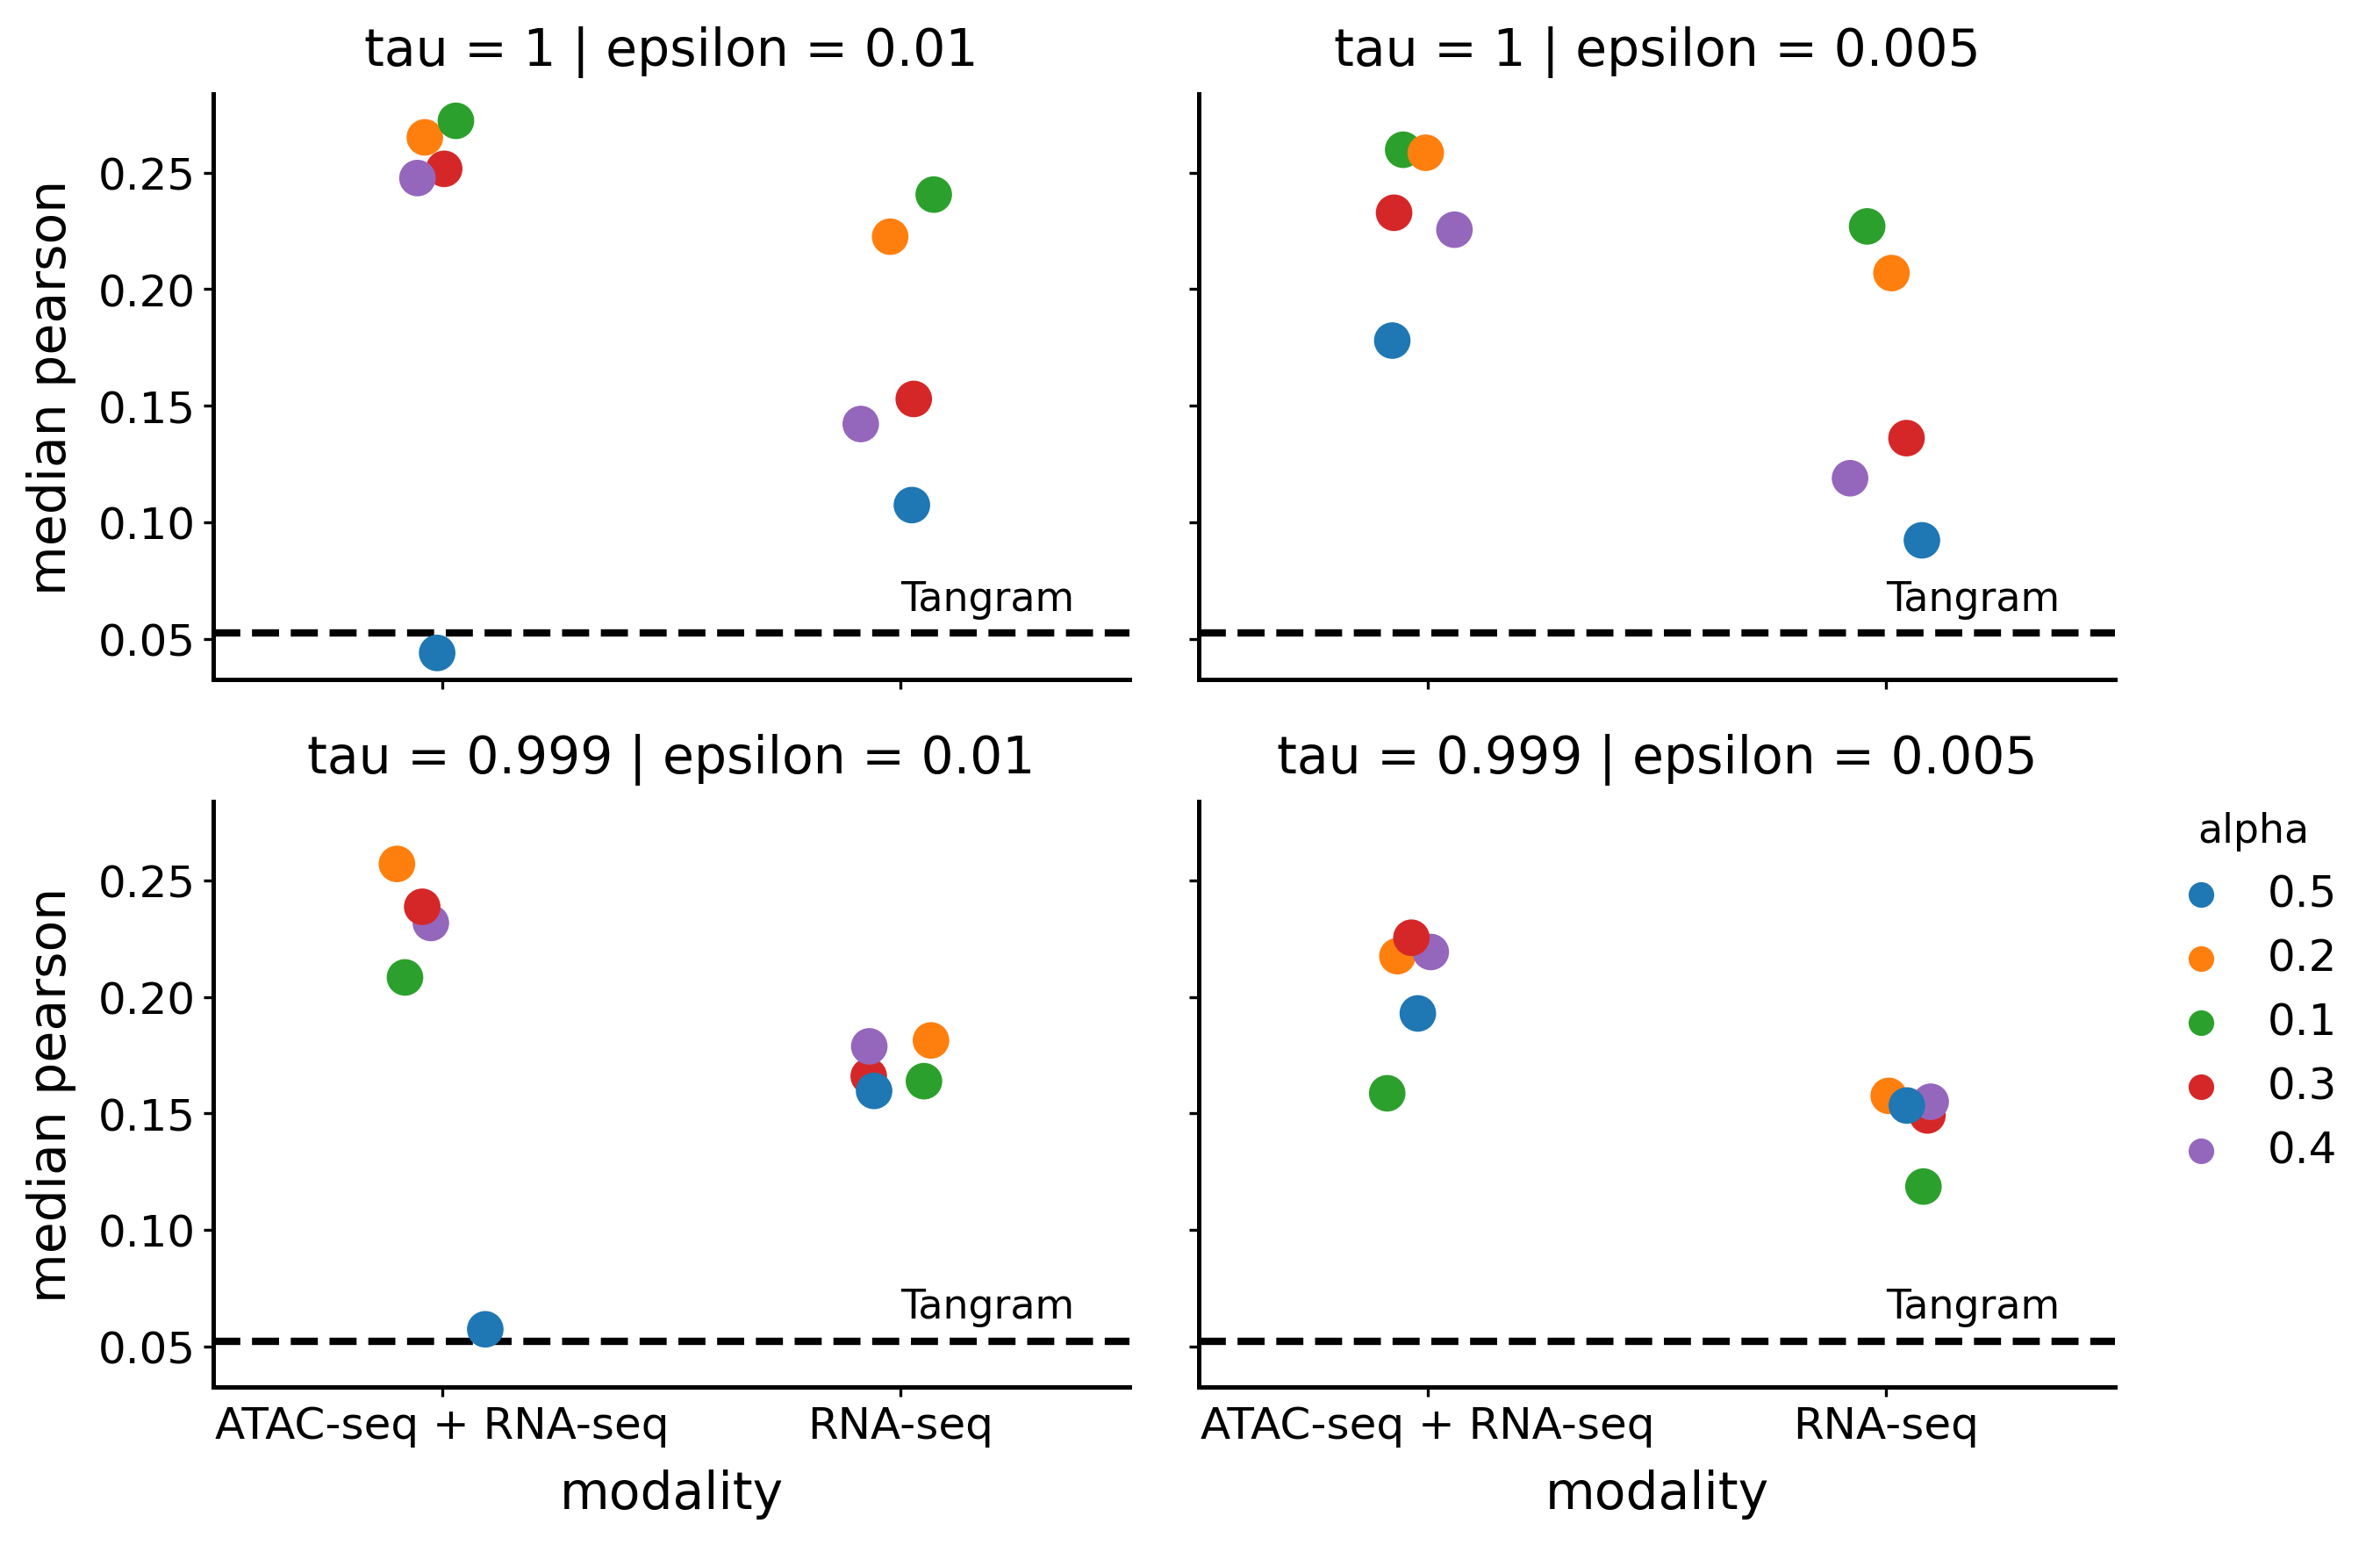

In [12]:
plt.rcParams['legend.scatterpoints'] = 1
outplot = sns.catplot(
    data=out[(out["epsilon"]!="0.05") & (out["method.name"]!="TANGRAM")],
    x="modality",
    y="median pearson",
    hue="alpha",
    col="epsilon",
    row="tau",
    # row="moscot.tau_a",
    # col_wrap=5,
    kind="strip",
    s=100,
    height=3, 
    aspect=5/4,
    legend=True,
    # legend_out=True,
)
sns.move_legend(outplot, "upper right", bbox_to_anchor=(1.1, 0.5))
outplot.map(plt.axhline, y=tangram_pearson, ls='--', color='black', linewidth=2)
outplot.map(plt.text, x= 1, y=tangram_pearson+0.01, s="Tangram", color="Black")
plt.tight_layout()

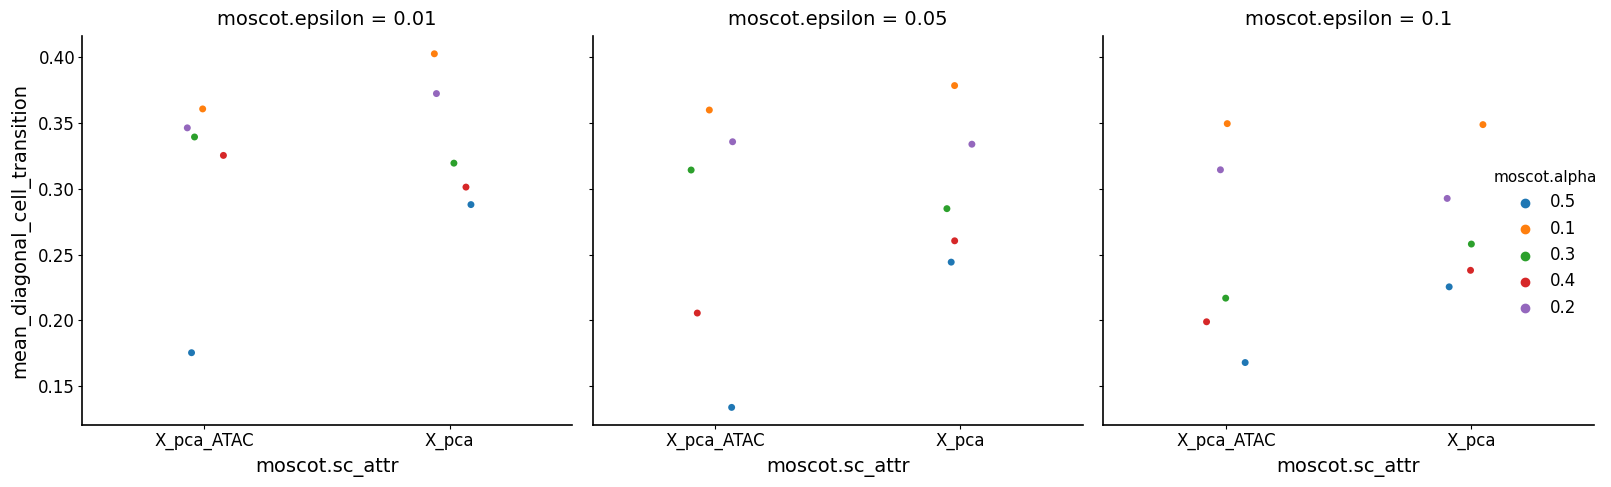

In [6]:
outplot = sns.catplot(
    data=out,
    x="moscot.sc_attr",
    y="mean_diagonal_cell_transition",
    hue="moscot.alpha",
    col="moscot.epsilon",
    # col_wrap=5,
    kind="strip",
)
# outplot.set_xlabels("steps", clear_inner=False)
plt.tight_layout()

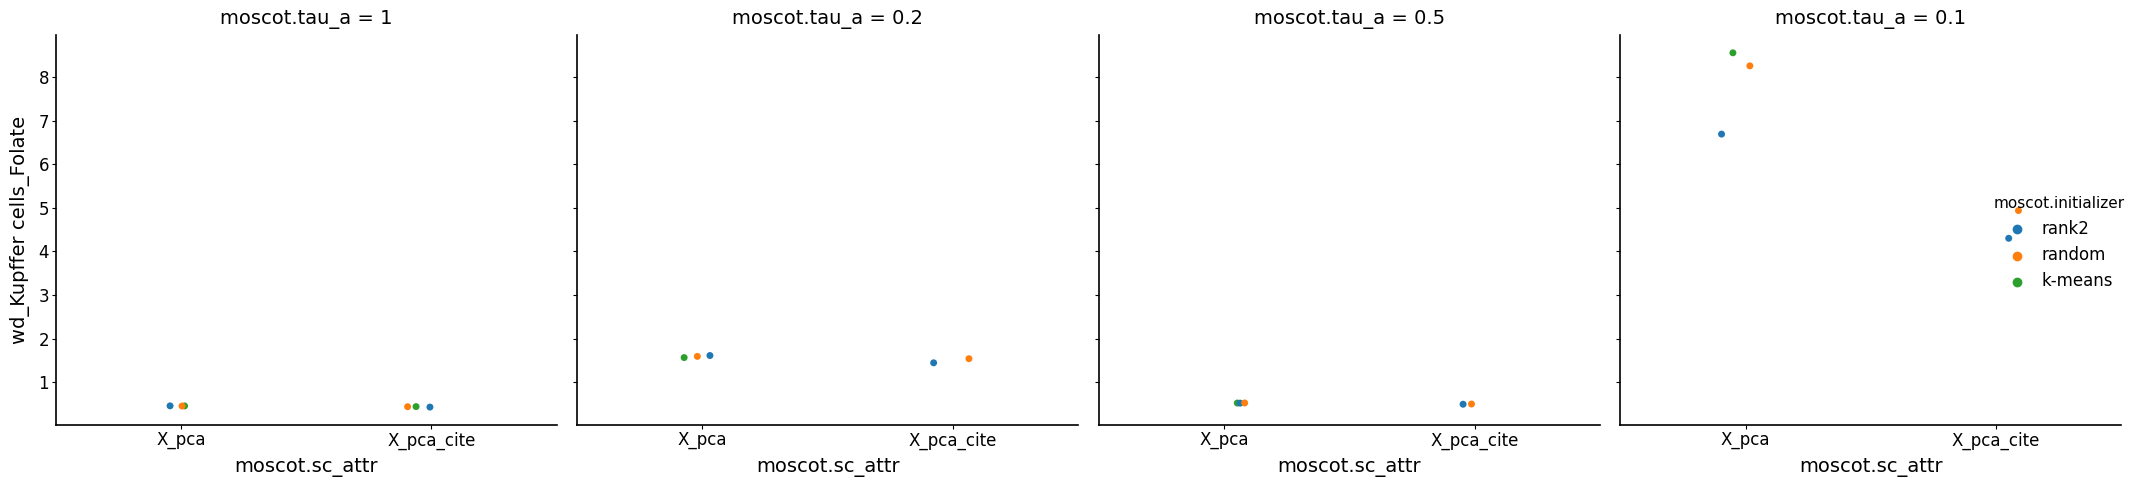

In [7]:
outplot = sns.catplot(
    data=out[(out["moscot.rank"]=="300")&(out["moscot.gamma"]=="10")],
    x="moscot.sc_attr",
    y="wd_Kupffer cells_Folate",
    col="moscot.tau_a",
    hue="moscot.initializer",
    # col_wrap=5,
    kind="strip",
)
# outplot.set_xlabels("steps", clear_inner=False)
plt.tight_layout()

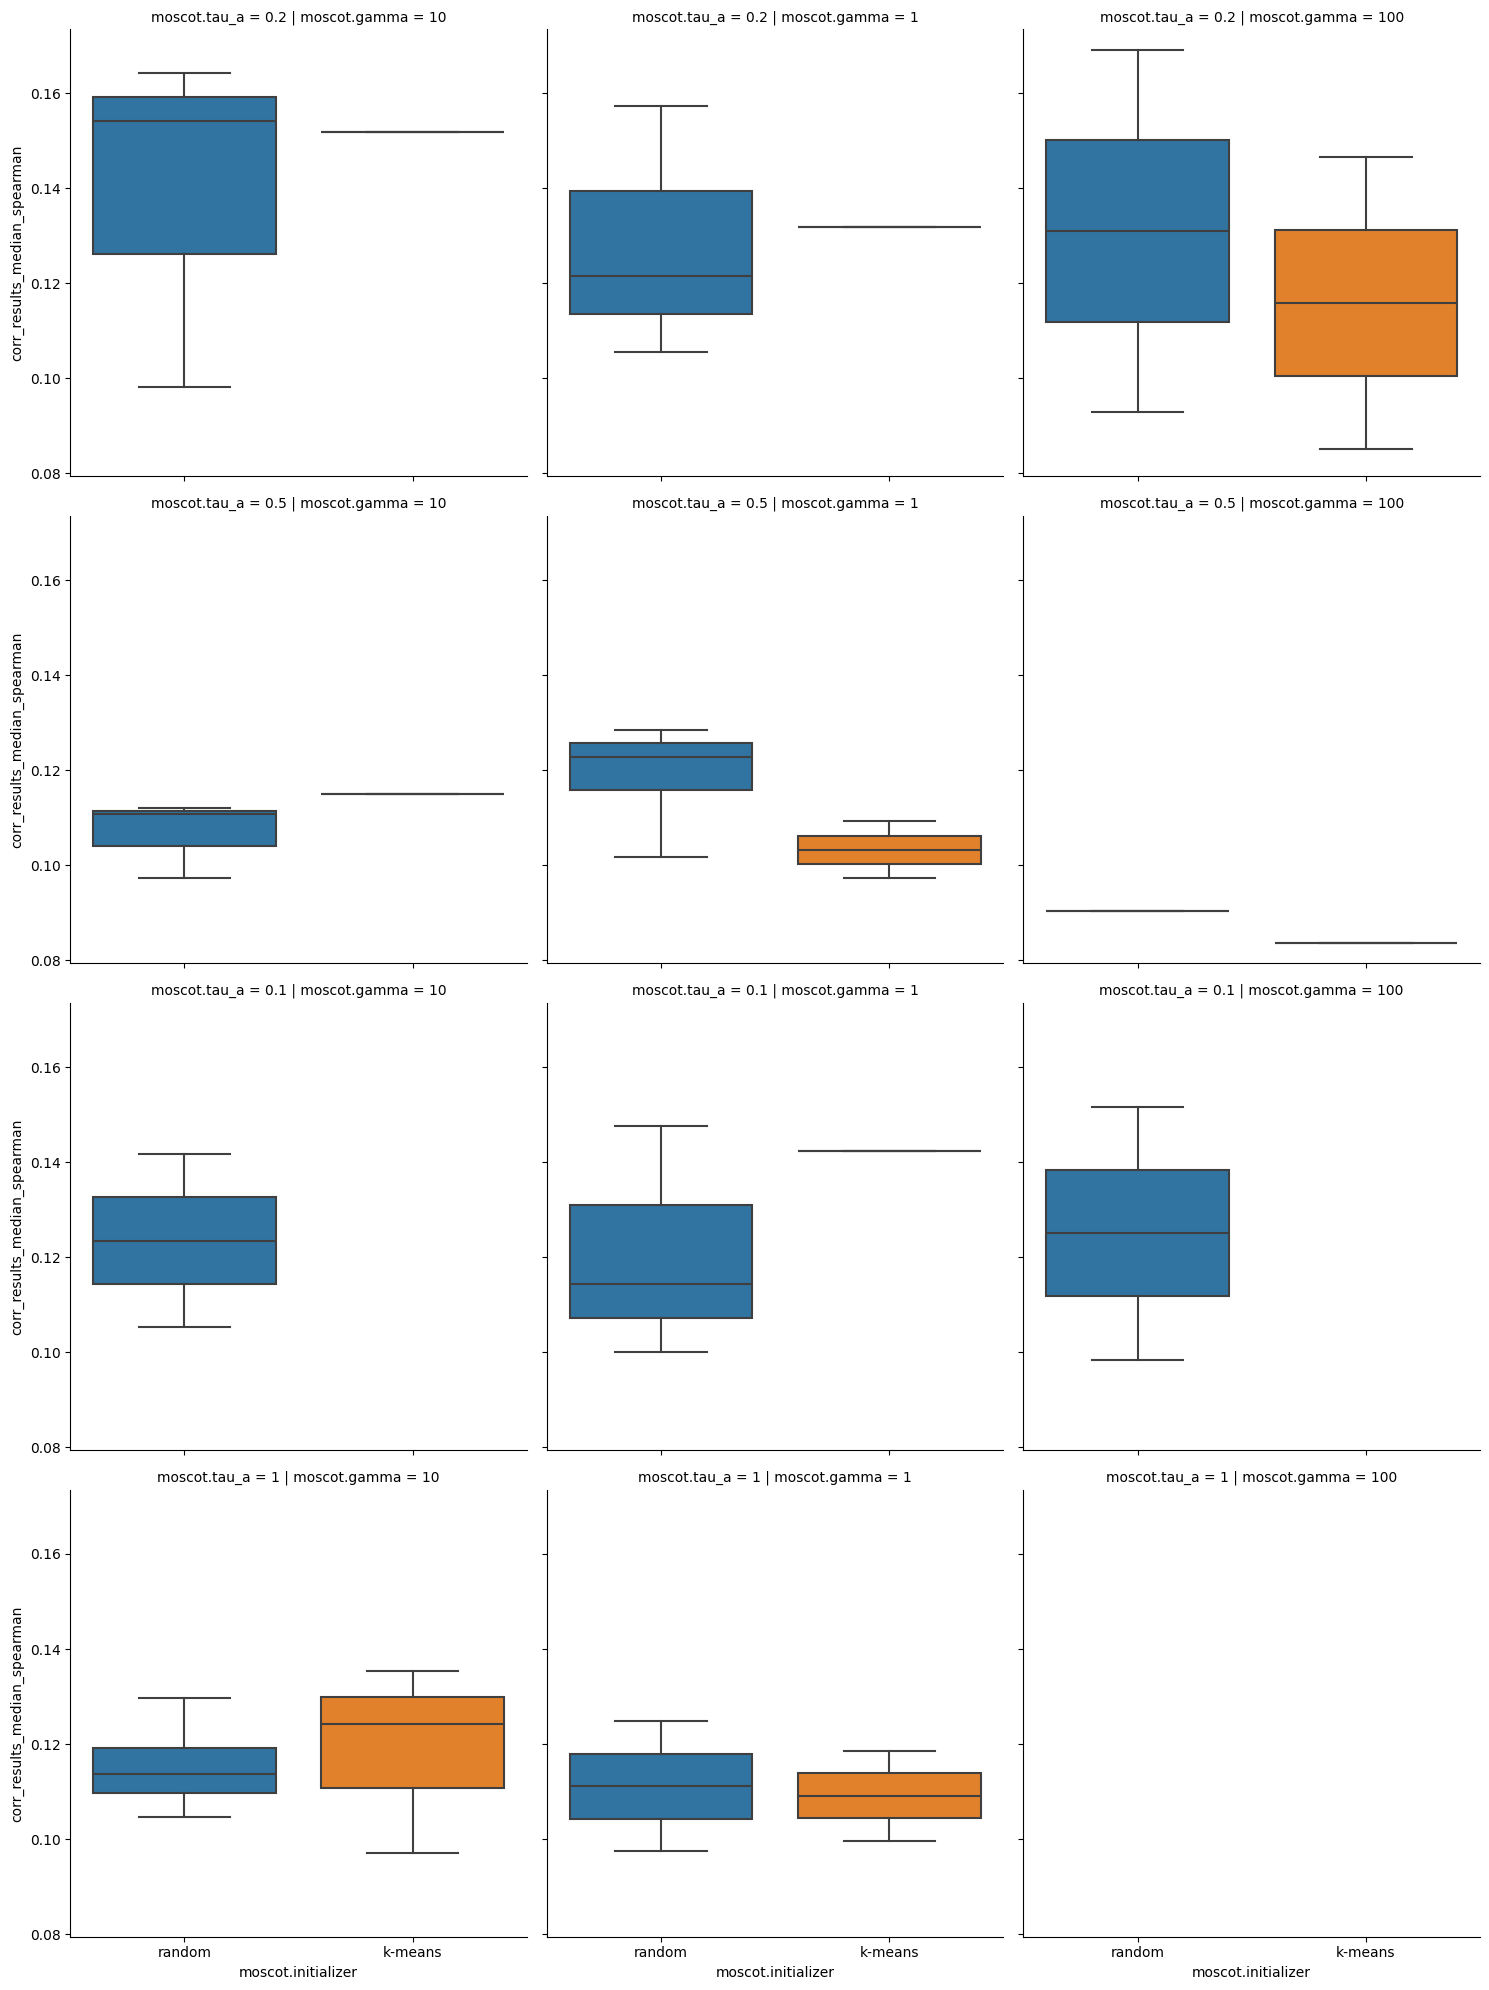

In [14]:
outplot = sns.catplot(
    data=out[out["moscot.rank"]=="300"],
    x="moscot.initializer",
    y="corr_results_median_spearman",
    col="moscot.gamma",
    row="moscot.tau_a",
    # col_wrap=5,
    kind="box",
)
# outplot.set_xlabels("steps", clear_inner=False)
plt.tight_layout()